Your assignment is to write up a set of comparisons for constructing the same visualization. You must evaluate matplotlib, vega-lite and bqplot, and you can choose one of the following in addition: D3, Bokeh, Plotly, R/RStudio. 

These comparisons should be:

- What is the license for the software?
- What is the focus of the software?
- Does it have interactivity, and how easy is it?
- What are the pros and cons of using it?

These should total roughly half a page per engine.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bqplot

In [40]:
max_f = pd.Series([73, 78, 84, 87, 80, 77, 81, 74])
min_f = pd.Series([59, 59, 66, 67, 60, 60, 59, 54])
dates = pd.Series(['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu_'])

In [41]:
for date, max, min in zip(dates, max_f, min_f):
	string = '{"date: "' + date + '", "max": ' + str(max) + ', "min": ' + str(min) + '}, '
	print(string)

{"date: "Thu", "max": 73, "min": 59}, 
{"date: "Fri", "max": 78, "min": 59}, 
{"date: "Sat", "max": 84, "min": 66}, 
{"date: "Sun", "max": 87, "min": 67}, 
{"date: "Mon", "max": 80, "min": 60}, 
{"date: "Tue", "max": 77, "min": 60}, 
{"date: "Wed", "max": 81, "min": 59}, 
{"date: "Thu_", "max": 74, "min": 54}, 


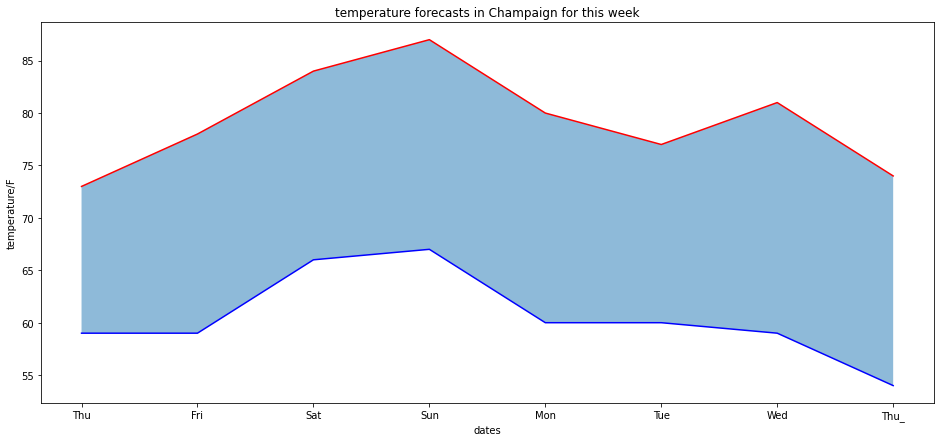

In [42]:
def mpl_plot():
	fig, ax = plt.subplots(figsize=(16, 7))
	ax.plot(dates, max_f, color='red')
	ax.plot(dates, min_f, color='blue')
	ax.fill_between(x=dates, y1=max_f, y2=min_f, alpha=0.50)
	ax.set_xlabel("dates")
	ax.set_ylabel("temperature/F")
	ax.set_title('temperature forecasts in Champaign for this week')

mpl_plot()

In [43]:
x = dates

x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()
line_max = bqplot.Lines(x=x, y=max_f, scales={'x':x_sc, 'y':y_sc}, colors=['red', 'yellow'])
line_min = bqplot.Lines(x=x, y=min_f, scales={'x':x_sc, 'y':y_sc})

ax_x = bqplot.Axis(scale=x_sc, label='dates')
ax_y = bqplot.Axis(scale=y_sc, label='temperature/F', orientation='vertical')

fig = bqplot.Figure(marks=[line_max, line_min], axes=[ax_x, ax_y], title='temperature forecasts in Champaign for this week')
fig

Figure(axes=[Axis(label='dates', scale=OrdinalScale()), Axis(label='temperature/F', orientation='vertical', sc…